In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from tqdm import tqdm
tqdm.pandas()
%matplotlib inline
font = {'family' : 'SimHei',
         'weight' : 'bold',
         'size'   : '16'}
plt.rc('font', **font)               # 设置字体的更多属性,
plt.rc('axes', unicode_minus=False)  # 解决坐标轴负数的负号显示问题

%config InlineBackend.figure_format = "retina"

In [2]:
data=pd.read_excel("收益率.xlsx")
data1=data.iloc[:,2:]
data2=pd.read_excel("回归数据.xlsx")
data3=data2[["证券名称","行业"]][::14]
data3["证券名称"]=data1.columns

In [ ]:
k_value=np.linspace(-1,1,100)            
max_subset_nodes={}            
for v in range(len(k_value)):
    cor2=data1.corr(method = "pearson")
    for i in range(len(cor2)):
        for j in range(len(cor2)):
            if cor2.iloc[i,j]>k_value[v]:
                cor2.iloc[i,j]=1
            else:
                cor2.iloc[i,j]=0
    for k in range(len(cor2)):
        cor2.iloc[k,k]=0
    
    A = cor2.values
    G = nx.from_numpy_matrix(A)
    max_cc =max(nx.algorithms.components.connected_components(G),key = len)
    ncc = float(len(max_cc))
    max_subset_nodes[k_value[v]]=ncc

上面代码一次性运行不出来，所以分批运行，（-1,1）之间100个值分批运行后将结果导出汇总，再读入分析即可

In [3]:
numbers=pd.read_excel("最大连通子图个数.xlsx")
nodes_numbers={}
for i in range(len(numbers)):
    nodes_numbers[numbers.iloc[:,0][i]]=numbers.iloc[:,1][i]

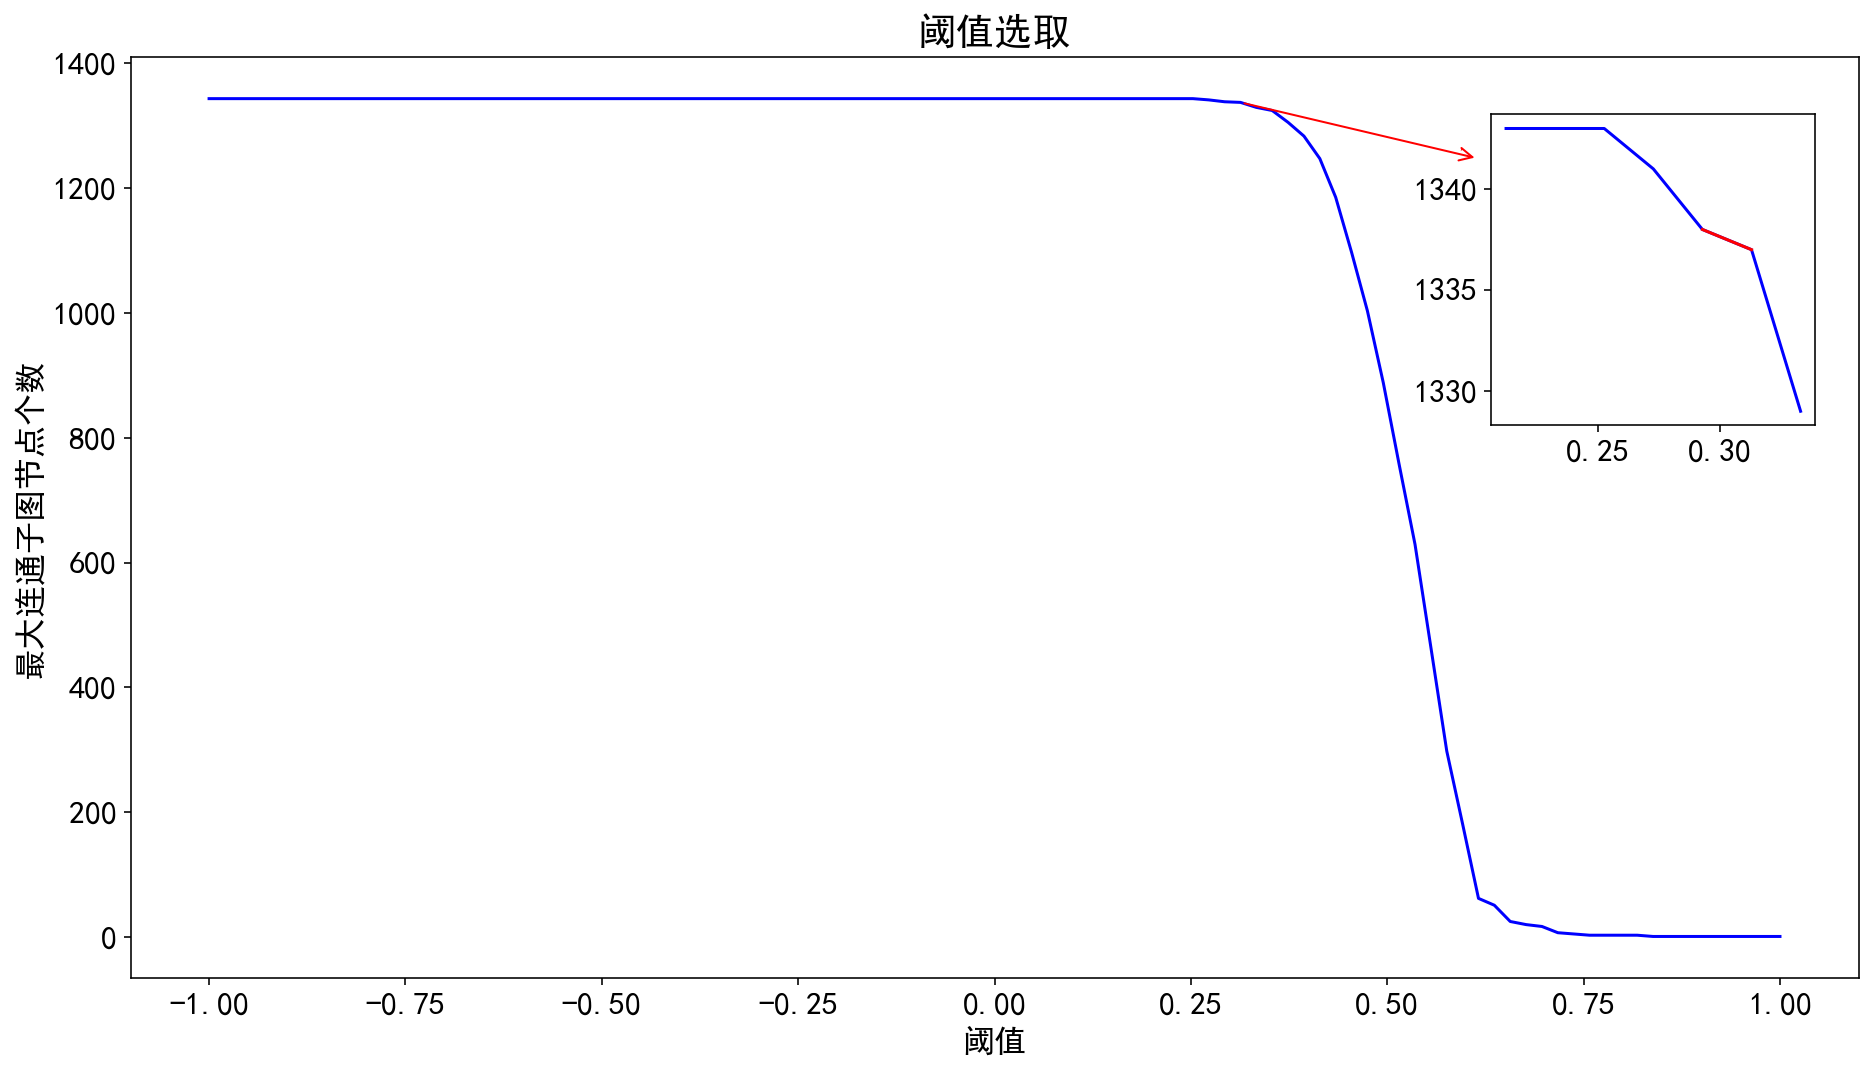

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,8))
x=[i for i in np.linspace(-1,1,100)]
y=[i for i in nodes_numbers.values()]
z=[i for i in np.linspace(-1,1,100)][60:67]
w=[i for i in nodes_numbers.values()][60:67]
# below are all percentage
left,bottom,width,height=0.1,0.2,0.8,0.8#从百分之多少开始，高度和宽度跨度多少
ax1 =fig.add_axes([left,bottom,width,height])#定义整个轴的参数的长宽高，
ax1.plot(x,y,'b')#传入x和y的参数，构建图片，r是red线条的颜色
ax1.set_xlabel(u'阈值')#给x轴和y轴起名
ax1.set_ylabel(u'最大连通子图节点个数')
ax1.set_title(u'阈值选取')#标题名称

left,bottom,width,height=0.73,0.68,0.15,0.27
ax2 =fig.add_axes([left,bottom,width,height])#定义整个轴的参数的长宽高，
ax2.plot(z,w,'b')#传入x和y的参数，构建图片，r是red线条的颜色
ax2.plot([x[64],x[65]],[y[64],y[65]],"r")
#ax2.set_xlabel('x')#给x轴和y轴起名
#ax2.set_ylabel('y')
#ax2.set_title('title')#标题名称

ax1.annotate('', xy=(x[80], y[70]), 
             xytext=(x[65],y[65]), arrowprops=dict(arrowstyle="->", color="r", hatch='*',))
plt.savefig("阈值选取参考-终.jpg")
plt.show()


In [7]:
kk=(1/3)*np.linspace(-1,1,100)[64]+(2/3)*np.linspace(-1,1,100)[65]

In [8]:
kk

0.30639730639730645

In [9]:
cor2=data1.corr(method = "pearson")
for i in range(len(cor2)):
    for j in range(len(cor2)):
        if cor2.iloc[i,j]>kk:
            cor2.iloc[i,j]=pow(2*(1-cor2.iloc[i,j]),0.5)
        else:
            cor2.iloc[i,j]=0

A = cor2.values
G = nx.from_numpy_matrix(A)
max_cc =max(nx.algorithms.components.connected_components(G),key = len)
ncc = float(len(max_cc))
ncc

1338.0

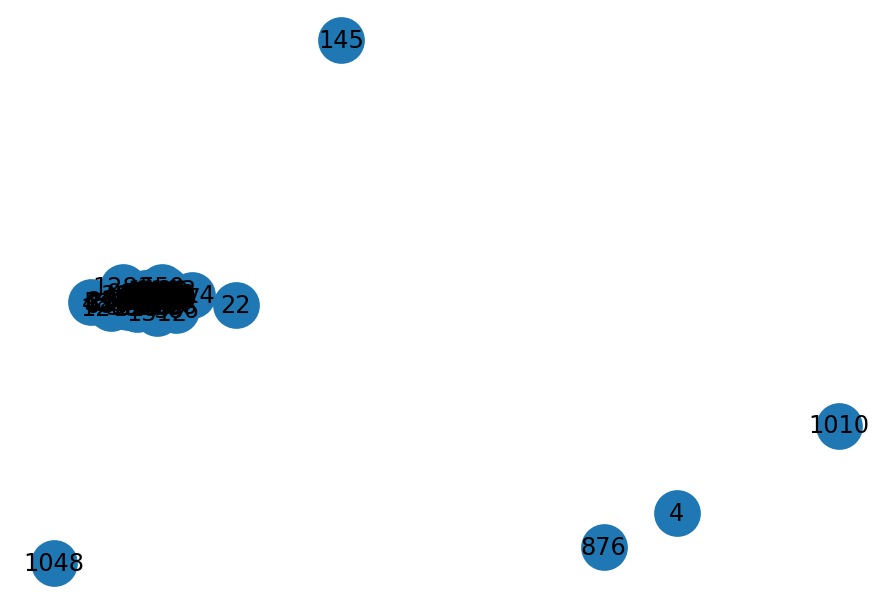

In [15]:
nx.draw(G,node_size = 500,with_labels = True)
plt.show()

In [10]:
###求得最小生成树,algorithm可以是kruskal,prim,boruvka一种,默认是kruskal 
KA = nx.minimum_spanning_tree(G,algorithm='kruskal') 
#直接拿到构成最小生成树的边,algorithm可以是kruskal,prim,boruvka一种,默认是kruskal 
mst = nx.minimum_spanning_edges(G, algorithm='kruskal', data=False) 
edgelist = list(mst) 

In [11]:
x = pd.DataFrame(np.zeros(1343*1343).reshape(1343,1343))
for i in edgelist:
    x.iloc[i[0],i[1]] = cor2.iloc[i[0],i[1]]
    x.iloc[i[1],i[0]] = cor2.iloc[i[0],i[1]]

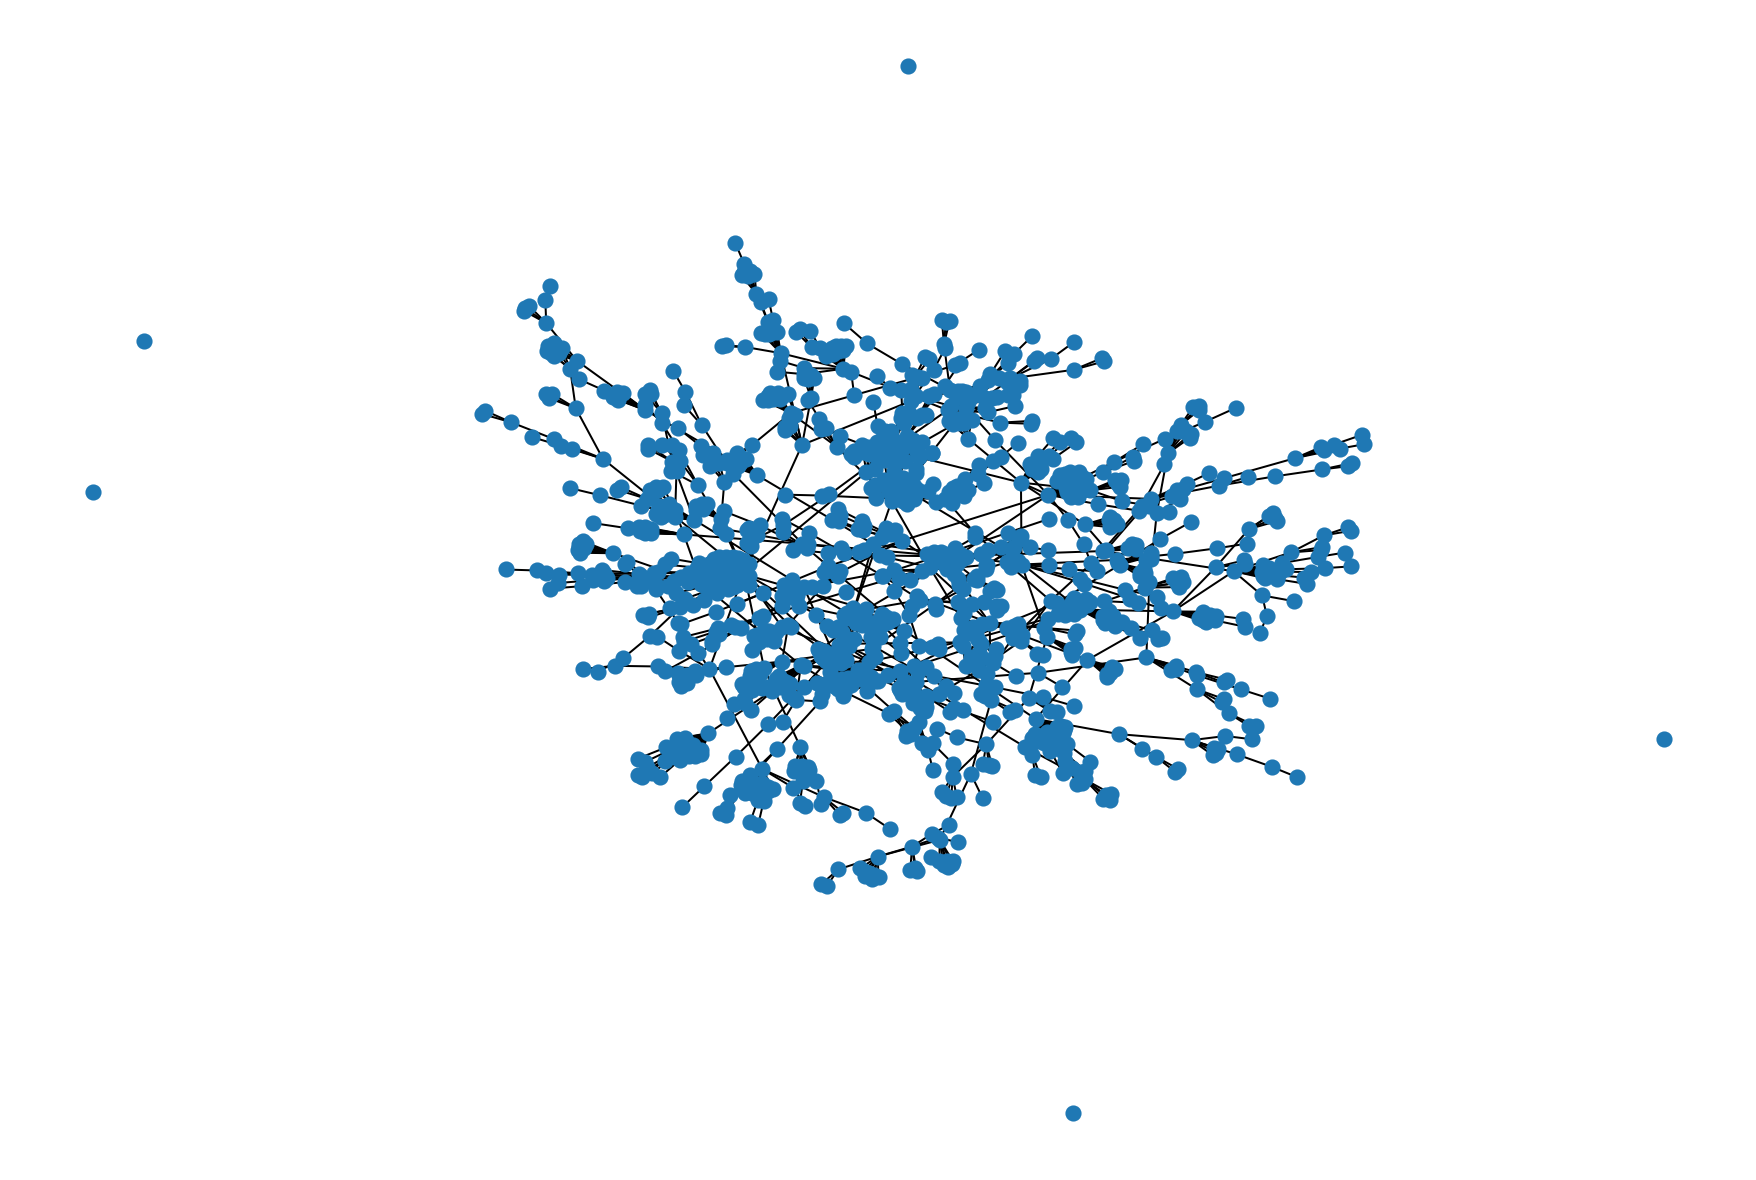

In [12]:
A = x.values
G = nx.from_numpy_matrix(A)
plt.figure(figsize = (12,8))
nx.draw(G,node_size = 50)
plt.savefig("网络连通图未去除孤立节点.jpg")

In [26]:
print(data1.columns[4],data1.columns[145],data1.columns[876],data1.columns[1010],data1.columns[1048])

*ST全新 平潭发展 青海春天 ST中珠 中毅达


# 最小生成数MST（去除不连通的点）

In [13]:
G.remove_node(4)
G.remove_node(145)
G.remove_node(876)
G.remove_node(1010)
G.remove_node(1048)

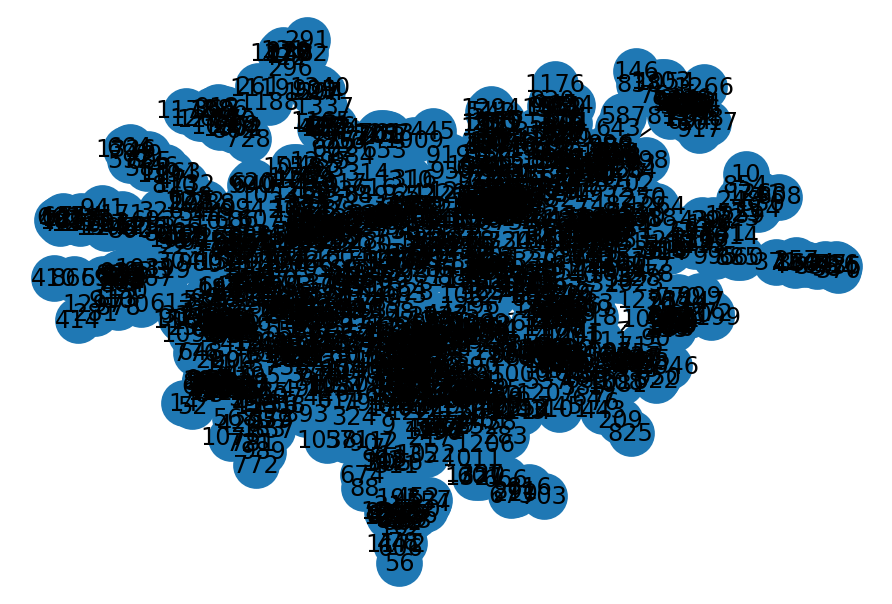

In [28]:
nx.draw(G, node_size=500, with_labels=True)

In [14]:
max_cc =max(nx.algorithms.components.connected_components(G),key = len)
ncc = float(len(max_cc))
ncc

1338.0

网络统计指标分析

In [31]:
# 获取网络G的度
d = nx.degree(G)
d = dict(nx.degree(G))
print("平均度为：", sum(d.values())/len(G.nodes))

平均度为： 1.9985052316890881


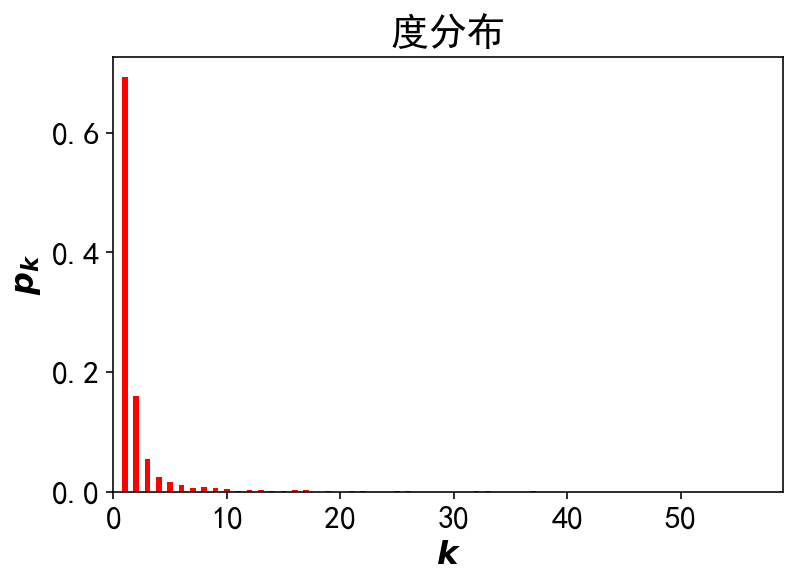

In [32]:
# 获取度分布
nx.degree_histogram(G) # 返回所有位于区间[0, dmax]的度值的频率列表
#绘制度分布直方图
import matplotlib.pyplot as plt

x = list(range(max(d.values())+1))
y = [i/len(G.nodes) for i in nx.degree_histogram(G)]
plt.bar(x, y, width=0.5, color="red")
plt.xlabel("$k$")
plt.ylabel("$p_k$")
plt.xlim([0,max(x)])
plt.title(u"度分布")
plt.savefig("度分布.jpg")

In [488]:
print(nx.is_connected(G))

# 求整个网络的平均距离,非联通网络求不求
nx.average_shortest_path_length(G)
# 直径，非联通网络求不求
print("网络的直径为：", nx.diameter(G))
# 求整个网络的平均距离，非联通网络求不求
print(nx.average_shortest_path_length(G))

True
网络的直径为： 34
14.144815881885354


In [490]:
# 集聚系数
#print(nx.clustering(G))
# 平均集聚系数
print(nx.average_clustering(G))
# 全局集聚系数
print(nx.transitivity(G))

0.0
0


In [487]:
# 局部效率
print(nx.local_efficiency(G))
# 全局效率
print(nx.global_efficiency(G))

0.0
0.09870382818169238


In [345]:
#1. 基于最近邻平均度值的度-度相关性
# 定义求最近邻平均度的函数
def average_nearest_neighbor_degree(G):
    k = set([G.degree(i) for i in G.nodes()])  # 获取所有可能的度值
    sorted_k = sorted(k)
   
    k_nn_k = []
    for ki in sorted_k:
        c = 0
        k_nn_i = 0
        for i in G.nodes():
            if G.degree(i) == ki: 
                k_nn_i += sum([G.degree(j) for j in list(nx.all_neighbors(G,i))])/ki
                c += 1
        k_nn_k.append(k_nn_i/c)    
   
    return sorted_k, k_nn_k
#2. 基于Pearson相关系数的度-度相关性
r2 = nx.degree_assortativity_coefficient(G)
r1 = nx.degree_pearson_correlation_coefficient(G)
print(r1,r2)

-0.21006567767927717 -0.21006567767927734


In [358]:
# 获取网络G的度
d = nx.degree(G)
d = dict(nx.degree(G))
sorted_d=sorted(d.items(),key=lambda x:x[1],reverse=True)
sorted_d[:10]

[(194, 59),
 (961, 37),
 (336, 33),
 (1092, 32),
 (341, 26),
 (812, 25),
 (284, 22),
 (50, 21),
 (1004, 19),
 (165, 17)]

In [478]:
d_max=pd.DataFrame(np.zeros(10*3).reshape(10,3),columns=["企业名称","度","所属行业"])
for i in range(len(sorted_d[:10])):
    d_max.iloc[i,0]=data1.columns[sorted_d[:10][i][0]]
    d_max.iloc[i,1]=sorted_d[:10][i][1]
    d_max.iloc[i,2]=data3[data3["证券名称"]==data1.columns[sorted_d[:10][i][0]]]["行业"]
d_max

,企业名称,度,所属行业
0,东方电子,59.0,软件和信息技术服务业
1,上海能源,37.0,煤炭开采和洗选业
2,金陵药业,33.0,医药制造业
3,天地源,32.0,房地产业
4,福星股份,26.0,房地产业
5,标准股份,25.0,专用设备制造业
6,鲁西化工,22.0,化学原料和化学制品制造业
7,中信海直,21.0,航空运输业
8,江西长运,19.0,道路运输业
9,海螺新材,17.0,橡胶和塑料制品业


In [485]:
d_min=pd.DataFrame(np.zeros(10*3).reshape(10,3),columns=["企业名称","度","所属行业"])
for i in range(len(sorted_d[:-11:-1])):
    d_min.iloc[i,0]=data1.columns[sorted_d[:-11:-1][i][0]]
    d_min.iloc[i,1]=sorted_d[:-11:-1][i][1]
    d_min.iloc[i,2]=data3[data3["证券名称"]==data1.columns[sorted_d[:-11:-1][i][0]]]["行业"]
d_min

,企业名称,度,所属行业
0,中远海控,1.0,水上运输业
1,潞安环能,1.0,煤炭开采和洗选业
2,中国国航,1.0,航空运输业
3,大秦铁路,1.0,铁路运输业
4,重庆钢铁,1.0,黑色金属冶炼和压延加工业
5,柳钢股份,1.0,黑色金属冶炼和压延加工业
6,晋控煤业,1.0,煤炭开采和洗选业
7,开滦股份,1.0,石油加工、炼焦和核燃料加工业
8,文山电力,1.0,电力、热力生产和供应业
9,马应龙,1.0,医药制造业


In [347]:
#节点介数
bc = nx.betweenness_centrality(G)
sorted_bc=sorted(bc.items(),key=lambda x: x[1],reverse=True)
sorted_bc[:10]

[(1066, 0.6158494529266075),
 (599, 0.5477250435553724),
 (1330, 0.5327370688689935),
 (675, 0.5156608995919904),
 (1288, 0.5054819306786577),
 (326, 0.5040912938520864),
 (1328, 0.5034799510925793),
 (1166, 0.5011174360329453),
 (607, 0.5009024583592725),
 (1092, 0.49662977709502465)]

In [466]:
bc_max=pd.DataFrame(np.zeros(10*3).reshape(10,3),columns=["企业名称","介数","所属行业"])
for i in range(len(sorted_bc[:10])):
    bc_max.iloc[i,0]=data1.columns[sorted_bc[:10][i][0]]
    bc_max.iloc[i,1]=sorted_bc[:10][i][1]
    bc_max.iloc[i,2]=data3[data3["证券名称"]==data1.columns[sorted_bc[:10][i][0]]]["行业"]
bc_max

,企业名称,介数,所属行业
0,大众公用,0.615849,燃气生产和供应业
1,中原高速,0.547725,道路运输业
2,北辰实业,0.532737,房地产业
3,弘业股份,0.515661,批发业
4,厦门空港,0.505482,航空运输业
5,厦门港务,0.504091,水上运输业
6,广深铁路,0.503480,铁路运输业
7,厦门国贸,0.501117,批发业
8,福建高速,0.500902,道路运输业
9,天地源,0.496630,房地产业


In [467]:
bc_min=pd.DataFrame(np.zeros(10*3).reshape(10,3),columns=["企业名称","介数","所属行业"])
for i in range(len(sorted_bc[:-11:-1])):
    bc_min.iloc[i,0]=data1.columns[sorted_bc[:-11:-1][i][0]]
    bc_min.iloc[i,1]=sorted_bc[:-11:-1][i][1]
    bc_min.iloc[i,2]=data3[data3["证券名称"]==data1.columns[sorted_bc[:-11:-1][i][0]]]["行业"]
bc_min

,企业名称,介数,所属行业
0,中远海控,0.0,水上运输业
1,潞安环能,0.0,煤炭开采和洗选业
2,中国国航,0.0,航空运输业
3,大秦铁路,0.0,铁路运输业
4,重庆钢铁,0.0,黑色金属冶炼和压延加工业
5,柳钢股份,0.0,黑色金属冶炼和压延加工业
6,晋控煤业,0.0,煤炭开采和洗选业
7,开滦股份,0.0,石油加工、炼焦和核燃料加工业
8,文山电力,0.0,电力、热力生产和供应业
9,马应龙,0.0,医药制造业


In [16]:
#计算网络的pagerank中心性程序如下：
pr = nx.pagerank(G, alpha=0.85)
sorted_pr= sorted(pr.items(), key=lambda x: x[1], reverse=True)
print(sorted_pr[:10])

[(194, 0.018603470651100174), (961, 0.011730677412020413), (336, 0.010892919312232166), (1092, 0.010217475075077974), (341, 0.008708355692242062), (812, 0.008524114394686866), (284, 0.007200019712972615), (50, 0.00688819941785573), (1004, 0.006565918193810388), (165, 0.005449779460394281)]


In [453]:
pagerank_max=pd.DataFrame(np.zeros(10*3).reshape(10,3),columns=["企业名称","pagerank值","所属行业"])
for i in range(len(sorted_pr[:10])):
    pagerank_max.iloc[i,0]=data1.columns[sorted_pr[:10][i][0]]
    pagerank_max.iloc[i,1]=sorted_pr[:10][i][1]
    pagerank_max.iloc[i,2]=data3[data3["证券名称"]==data1.columns[sorted_pr[:10][i][0]]]["行业"]
pagerank_max

,企业名称,pagerank值,所属行业
0,东方电子,0.018603,软件和信息技术服务业
1,上海能源,0.011731,煤炭开采和洗选业
2,金陵药业,0.010893,医药制造业
3,天地源,0.010217,房地产业
4,福星股份,0.008708,房地产业
5,标准股份,0.008524,专用设备制造业
6,鲁西化工,0.007200,化学原料和化学制品制造业
7,中信海直,0.006888,航空运输业
8,江西长运,0.006566,道路运输业
9,海螺新材,0.005450,橡胶和塑料制品业


In [462]:
pagerank_min=pd.DataFrame(np.zeros(10*3).reshape(10,3),columns=["企业名称","pagerank值","所属行业"])
for i in range(len(sorted_pr[:-11:-1])):
    pagerank_min.iloc[i,0]=data1.columns[sorted_pr[:-11:-1][i][0]]
    pagerank_min.iloc[i,1]=sorted_pr[:-11:-1][i][1]
    pagerank_min.iloc[i,2]=data3[data3["证券名称"]==data1.columns[sorted_pr[:-11:-1][i][0]]]["行业"]
pagerank_min

,企业名称,pagerank值,所属行业
0,电投能源,0.000320,煤炭开采和洗选业
1,兰花科创,0.000326,煤炭开采和洗选业
2,辽宁成大,0.000336,批发业
3,开滦股份,0.000337,石油加工、炼焦和核燃料加工业
4,新世界,0.000338,零售业
5,宝钢股份,0.000339,黑色金属冶炼和压延加工业
6,航天长峰,0.000339,专用设备制造业
7,泸州老窖,0.000345,酒、饮料和精制茶制造业
8,恒源煤电,0.000347,煤炭开采和洗选业
9,株冶集团,0.000351,有色金属冶炼和压延加工业


In [479]:
x1, y1 = average_nearest_neighbor_degree(G)

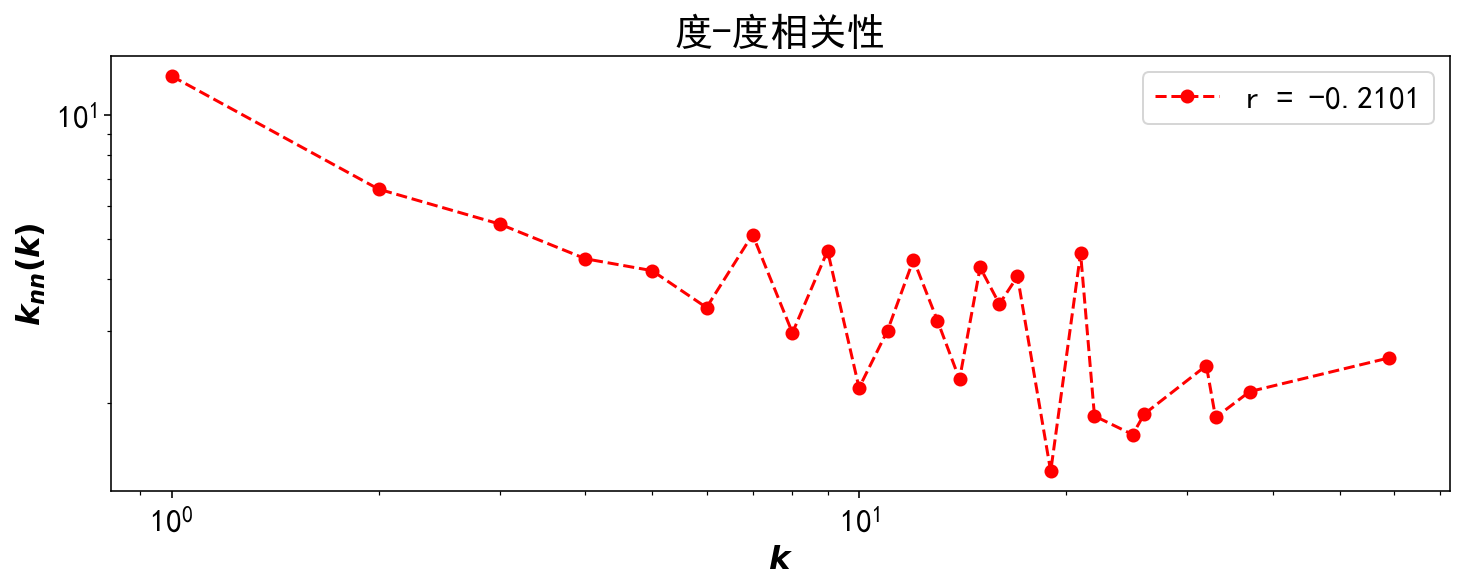

In [484]:
plt.figure(figsize=(12,4))
plt.plot(x1, y1, 'ro--', label='r = '+'%.4f'%r1)
plt.legend(loc=0)
plt.xlabel("$k$")
plt.ylabel("$k_{nn}(k)$")
plt.xscale("log")
plt.yscale("log")
plt.title("度-度相关性")
plt.savefig("最邻度度相关.jpg")

In [491]:
# 度中心性
dc1 = nx.degree_centrality(G)
# 介数中心性
bc1 = nx.betweenness_centrality(G)
# 接近度中心性
cc1 = nx.closeness_centrality(G)
# 特征向量中心性
ec1 = nx.eigenvector_centrality(G)


In [537]:
index=(np.array([i for i in dc1.values()])+np.array([i for i in bc1.values()])+np.array([i for i in cc1.values()])+np.array([i for i in ec1.values()]))/4
central_index={}
for i in range(len(dc1)):
    central_index[[j for j in dc1.keys()][i]]=index[i]
central_index
sorted_ci= sorted(central_index.items(), key=lambda x: x[1], reverse=True)
print(sorted_ci[:10])

[(194, 0.32956647192775945), (1066, 0.18545442369790152), (599, 0.16559735384358143), (1330, 0.1613094249335165), (675, 0.15713878571230538), (739, 0.15465031215474984), (1092, 0.1544274780435458), (1288, 0.15271769258238663), (1328, 0.15251903511301404), (326, 0.15239854513248446)]


In [538]:
central_index_max=pd.DataFrame(np.zeros(10*3).reshape(10,3),columns=["企业名称","中心性综指","所属行业"])
for i in range(len(sorted_ci[:10])):
    central_index_max.iloc[i,0]=data1.columns[sorted_ci[:10][i][0]]
    central_index_max.iloc[i,1]=sorted_ci[:10][i][1]
    central_index_max.iloc[i,2]=data3[data3["证券名称"]==data1.columns[sorted_ci[:10][i][0]]]["行业"]
central_index_max

,企业名称,中心性综指,所属行业
0,东方电子,0.329566,软件和信息技术服务业
1,大众公用,0.185454,燃气生产和供应业
2,中原高速,0.165597,道路运输业
3,北辰实业,0.161309,房地产业
4,弘业股份,0.157139,批发业
5,紫江企业,0.154650,橡胶和塑料制品业
6,天地源,0.154427,房地产业
7,厦门空港,0.152718,航空运输业
8,广深铁路,0.152519,铁路运输业
9,厦门港务,0.152399,水上运输业


In [539]:
central_index_min=pd.DataFrame(np.zeros(10*3).reshape(10,3),columns=["企业名称","中心性综指","所属行业"])
for i in range(len(sorted_ci[:-11:-1])):
    central_index_min.iloc[i,0]=data1.columns[sorted_ci[:-11:-1][i][0]]
    central_index_min.iloc[i,1]=sorted_ci[:-11:-1][i][1]
    central_index_min.iloc[i,2]=data3[data3["证券名称"]==data1.columns[sorted_ci[:-11:-1][i][0]]]["行业"]
central_index_min

,企业名称,中心性综指,所属行业
0,京新药业,0.011906,医药制造业
1,ST易购,0.011907,零售业
2,福田汽车,0.011958,汽车制造业
3,冠豪高新,0.012481,造纸和纸制品业
4,创元科技,0.012481,综合
5,郴电国际,0.012482,电力、热力生产和供应业
6,抚顺特钢,0.012538,黑色金属冶炼和压延加工业
7,杭钢股份,0.012538,黑色金属冶炼和压延加工业
8,中信特钢,0.012538,黑色金属冶炼和压延加工业
9,中源协和,0.013021,研究和试验发展


Text(0.5, 1.0, 'eigenvector_centrality')

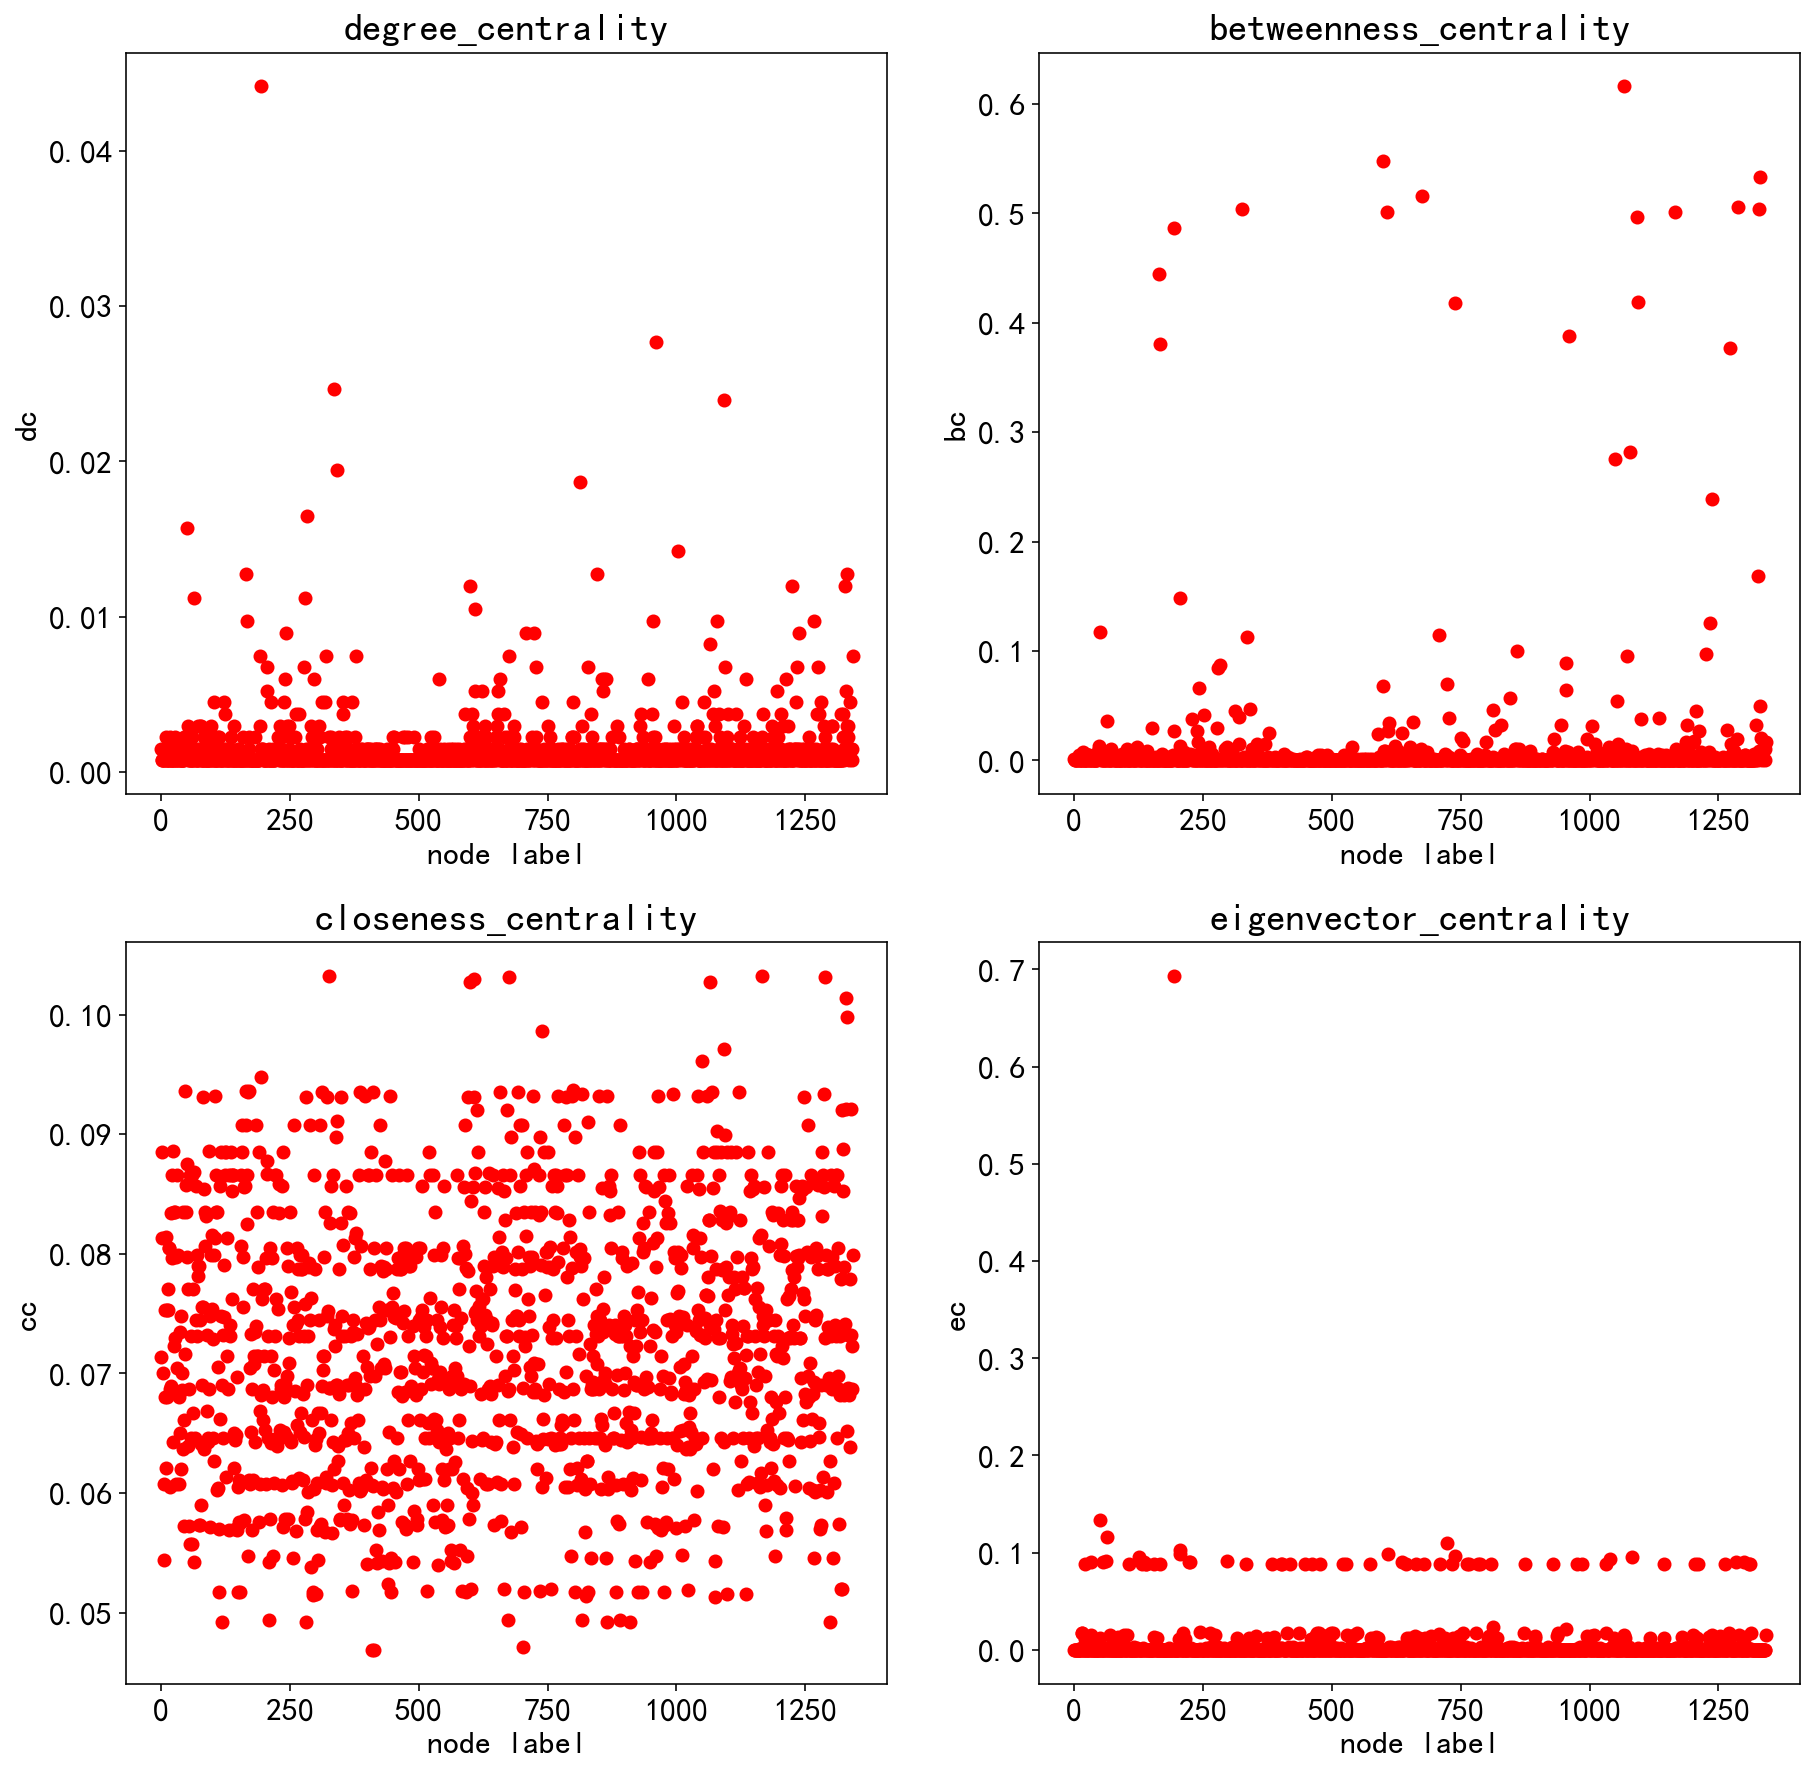

In [492]:
# 绘图比较
plt.figure(figsize=(15,15))
plt.subplot(221)
plt.plot(dc1.keys(), dc1.values(), 'ro')
plt.xlabel("node label")
plt.ylabel("dc")
plt.title("degree_centrality")

plt.subplot(222)
plt.plot(bc1.keys(), bc1.values(), 'ro', label='ER')
plt.xlabel("node label")
plt.ylabel("bc")
plt.title("betweenness_centrality")

plt.subplot(223)
plt.plot(cc1.keys(), cc1.values(), 'ro', label='ER')
plt.xlabel("node label")
plt.ylabel("cc")
plt.title("closeness_centrality")

plt.subplot(224)
plt.plot(ec1.keys(), ec1.values(), 'ro', label='ER')
plt.xlabel("node label")
plt.ylabel("ec")
plt.title("eigenvector_centrality")


# 基于pagerank的网络抗毁性分析

# 蓄意攻击

In [37]:

max_cc =max(nx.algorithms.components.connected_components(G),key = len)
ncc = float(len(max_cc))
ncc

1338.0

In [38]:
print(nx.global_efficiency(G))

0.09870382818169238


In [39]:
S={}
E={}
for i in sorted_pr[:100]:
    G.remove_node(i[0])
    max_cc =max(nx.algorithms.components.connected_components(G),key = len)
    ncc = float(len(max_cc))
    efficient=nx.global_efficiency(G)
    S[i[0]]=ncc
    E[i[0]]=efficient


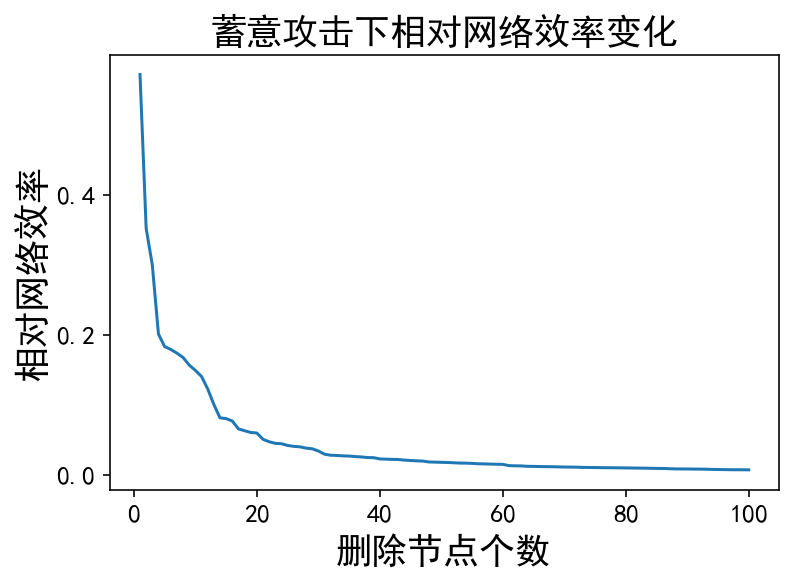

In [40]:
x=list(np.linspace(1,100,100))
y=list(np.array(list(E.values()))/0.09870382818169238)
plt.plot(x, y)
plt.xlabel(u"删除节点个数",fontsize=18) #X轴标签
plt.ylabel(u"相对网络效率",fontsize=18) #Y轴标签
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title(u"蓄意攻击下相对网络效率变化",fontsize=18) #标题
plt.savefig("蓄意攻击下相对网络效率变化.jpg")
plt.show()

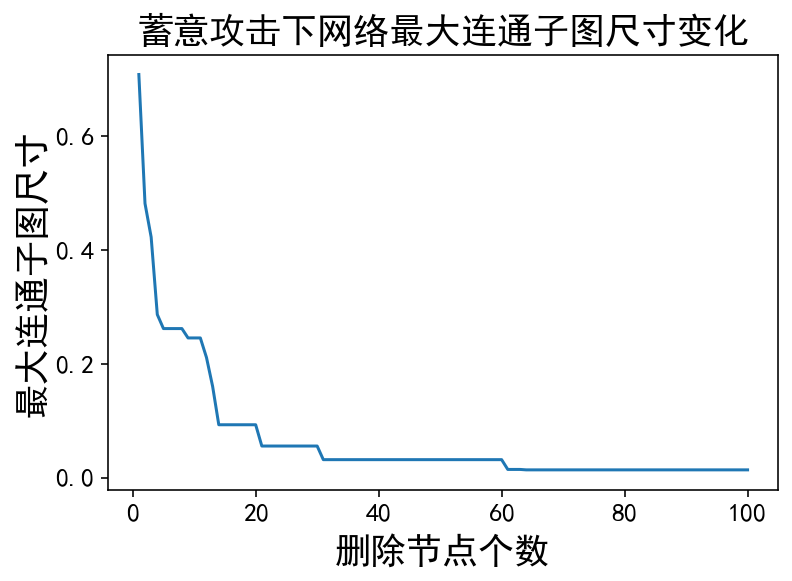

In [41]:
x=list(np.linspace(1,100,100))
y=list(np.array(list(S.values()))/1338)
plt.plot(x, y)
plt.xlabel(u"删除节点个数",fontsize=18) #X轴标签
plt.ylabel(u"最大连通子图尺寸",fontsize=18) #Y轴标签
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title(u"蓄意攻击下网络最大连通子图尺寸变化",fontsize=18) #标题
plt.savefig("蓄意攻击下网络最大连通子图尺寸变化.jpg")
plt.show()

# 随机攻击

In [32]:
cor2=data1.corr(method = "pearson")
for i in range(len(cor2)):
    for j in range(len(cor2)):
        if cor2.iloc[i,j]>kk:
            cor2.iloc[i,j]=pow(2*(1-cor2.iloc[i,j]),0.5)
        else:
            cor2.iloc[i,j]=0

A = cor2.values
G = nx.from_numpy_matrix(A)

In [33]:
###求得最小生成树,algorithm可以是kruskal,prim,boruvka一种,默认是kruskal 
KA = nx.minimum_spanning_tree(G,algorithm='kruskal')  
#直接拿到构成最小生成树的边,algorithm可以是kruskal,prim,boruvka一种,默认是kruskal 
mst = nx.minimum_spanning_edges(G, algorithm='kruskal', data=False) 
edgelist = list(mst)

In [34]:
x = pd.DataFrame(np.zeros(1343*1343).reshape(1343,1343))
for i in edgelist:
    x.iloc[i[0],i[1]] = cor2.iloc[i[0],i[1]]
    x.iloc[i[1],i[0]] = cor2.iloc[i[0],i[1]]

In [35]:
A = x.values
G = nx.from_numpy_matrix(A)

In [36]:
G.remove_node(4)
G.remove_node(145)
G.remove_node(876)
G.remove_node(1010)
G.remove_node(1048)

随机攻击开始

In [24]:
max_cc =max(nx.algorithms.components.connected_components(G),key = len)
ncc = float(len(max_cc))
ncc

1338.0

In [25]:
print(nx.global_efficiency(G))

0.09870382818169238


In [27]:
import random
pr_node=[i[0] for i in sorted_pr]
random.seed(1343)
random_node=random.sample(pr_node,100)

In [28]:
S1={}
E1={}
for i in random_node:
    G.remove_node(i)
    max_cc =max(nx.algorithms.components.connected_components(G),key = len)
    ncc = float(len(max_cc))
    efficient=nx.global_efficiency(G)
    S1[i]=ncc
    E1[i]=efficient


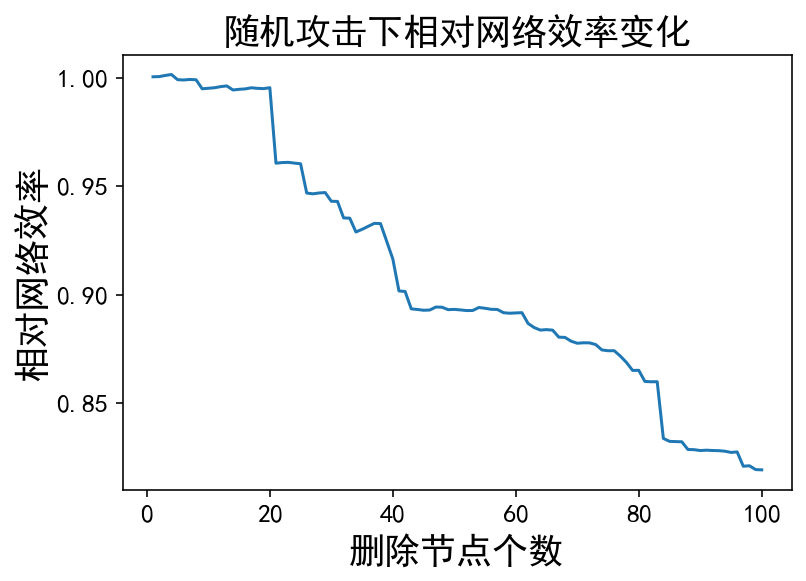

In [29]:
x=list(np.linspace(1,100,100))
y=list(np.array(list(E1.values()))/0.09870382818169238)
plt.plot(x, y)
plt.xlabel(u"删除节点个数",fontsize=18) #X轴标签
plt.ylabel(u"相对网络效率",fontsize=18) #Y轴标签
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title(u"随机攻击下相对网络效率变化",fontsize=18) #标题
plt.savefig("随机攻击下相对网络效率变化.jpg")
plt.show()

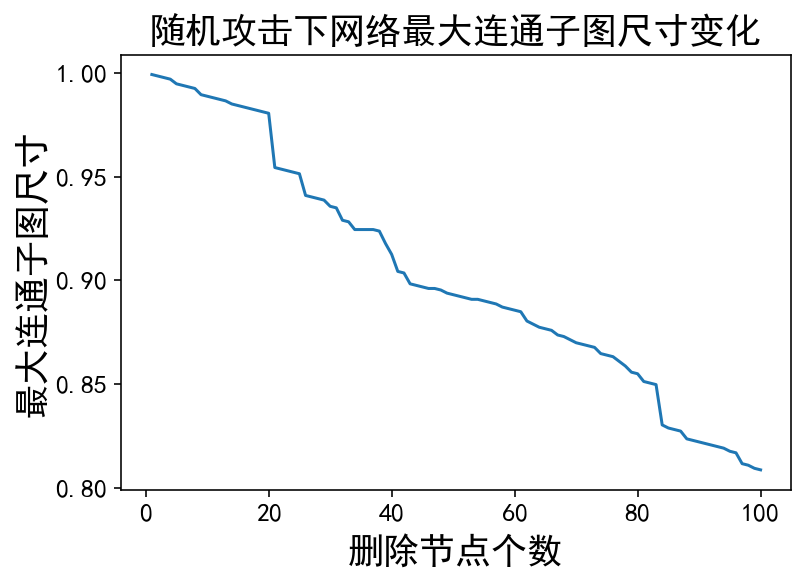

In [31]:
x=list(np.linspace(1,100,100))
y=list(np.array(list(S1.values()))/1338)
plt.plot(x, y)
plt.xlabel(u"删除节点个数",fontsize=18) #X轴标签
plt.ylabel(u"最大连通子图尺寸",fontsize=18) #Y轴标签
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title(u"随机攻击下网络最大连通子图尺寸变化",fontsize=18) #标题
plt.savefig("随机攻击下网络最大连通子图尺寸变化.jpg")
plt.show()